In [8]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator

In [17]:

num_qubits = 8


In [18]:
def alice_side(num_qubits,random):
    alice_state = np.random.randint(2, size=num_qubits)
    if random ==True:
        alice_basis = np.random.randint(2, size=num_qubits)
    else:
        alice_basis = []
        print("choose 1 for Hadamard Basis & 0 for Computational Basis")
        for i in range(num_qubits):
            x = int(input(">>"))
            alice_basis.append(x)
            
        
    return alice_state,alice_basis

In [19]:
def bob_side(num_qubits,random):
    if random==True:
        bob_basis = np.random.randint(2, size=num_qubits)
    else:
        bob_basis=[]
        print("choose 1 for Hadamard Basis & 0 for Computational Basis")
        for i in range(num_qubits):
            y = int(input(">>"))
            bob_basis.append(y)
            
            
    return bob_basis
        

In [20]:
alice_state_nBasis=alice_side(8,True)
bobs_measurement_basis = bob_side(8,True)

In [21]:
def bb84_circuit(state, basis, measurement_basis):
    '''
    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    '''
    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)

    circuit.measure_all()
    
    return circuit

In [22]:
print(alice_state_nBasis[0])

[1 1 0 1 0 0 0 1]


In [23]:
print(alice_state_nBasis[1])

[0 0 1 1 0 1 1 1]


In [24]:
print(bobs_measurement_basis)

[0 1 0 0 0 0 1 1]


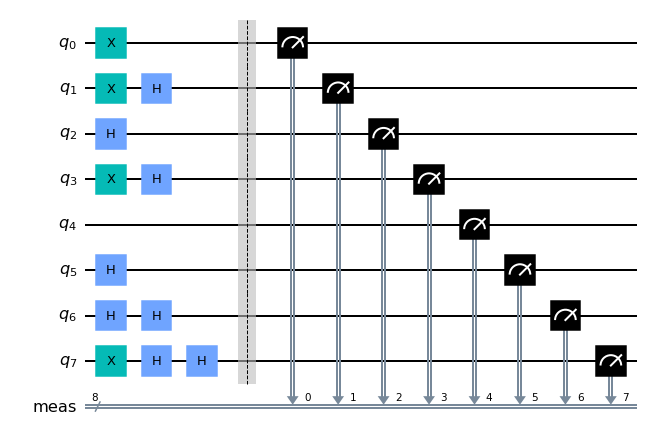

In [25]:
circuit = bb84_circuit(alice_state_nBasis[0], alice_state_nBasis[1], bobs_measurement_basis)
circuit.draw('mpl')

In [27]:
circuit = bb84_circuit(alice_state_nBasis[0], alice_state_nBasis[1], bobs_measurement_basis)
key = execute(circuit,backend=QasmSimulator(),shots=1).result().get_counts().most_frequent()
encryption_key = ''
#print(key)

for i in range(num_qubits):
    if alice_state_nBasis[1][i] == bobs_measurement_basis[i]:
        encryption_key += str(key[num_qubits -1-i])
    else:
        encryption_key += str(0)
        
print(f"Key: {encryption_key}")

Key: 10000001
